In [1]:
import os
import sys
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.spatial.distance as ssd
import matplotlib as mpl
from matplotlib.colors import LinearSegmentedColormap

In [2]:
# read in the qualtax dataframe to get taxonomy and completeness of bins
with open( '/Volumes/KeithSSD/CBFunctions/data/outputs/qual_tax_full.p', "rb" ) as fh:
    qualtax = pickle.load(fh)

print(type(qualtax), 'is in the pickle')

# formatting
conversions = [('Contamination', 2), ('Completeness', 2), ('red_value', 3)]
for i, j in conversions:
    qualtax[i] = qualtax[i].astype(float)
    ibool = qualtax.Contamination.notnull()
    qualtax.loc[ibool, i] = qualtax.loc[ibool, i].round(j)

print(qualtax.shape, 'total bins')

# remove controls
qualtax = qualtax.loc[[i for i in qualtax.index if not i.startswith('Zymo')], :].copy()

print(qualtax.shape[0], 'bins after removing controls')
print(qualtax.shape[1], 'columns')

with open('/Volumes/KeithSSD/CBFunctions/data/outputs/bin_abund_n_metadata.p', "rb" ) as fh:
    outpkg = pickle.load(fh)

name_correction = outpkg['renamer']
metadata = outpkg['meta']
cb33_abnd, cbTr_abnd = outpkg['cb33_abnd'], outpkg['cbTr_abnd']

sig_pres_fxn = lambda x: (x > 1).sum()
abund_srs = cbTr_abnd.apply(sig_pres_fxn).append(cb33_abnd.apply(sig_pres_fxn))
abund_srs = (abund_srs).round(1)
abund_srs.name = '% samples w/ Mean Cov > 2x'

abund_srs2 = cbTr_abnd.apply(np.max).append(cb33_abnd.apply(np.max))
abund_srs2 = (abund_srs2).round(1)
abund_srs2.name = 'MaxCopyNumber'

qualtax = qualtax.join(abund_srs).join(abund_srs2)
print(qualtax.shape[1], 'columns after adding max/thresholded abund cols')

<class 'pandas.core.frame.DataFrame'> is in the pickle
(666, 61) total bins
656 bins after removing controls
61 columns
63 columns after adding max/thresholded abund cols


In [3]:
first_bool = (qualtax['Completeness'] > 80.) & (qualtax[abund_srs.name] > 1)
print(first_bool.sum(), 'completeish bins')

display_cols = ['Completeness', 'Contamination', 'red_value', 'aa_percent', 'Phylum',
                'Class', 'Order', 'Family', 'Genus', 'Species', abund_srs.name, 'MaxCopyNumber', 
                'N50 (contigs)', 'GenomeSizeMbp']


qualtax.loc[first_bool, display_cols].sort_values(by='MaxCopyNumber', ascending=False).head(35)

52 completeish bins


,Completeness,Contamination,red_value,aa_percent,Phylum,Class,Order,Family,Genus,Species,% samples w/ Mean Cov > 2x,MaxCopyNumber,N50 (contigs),GenomeSizeMbp
CBrest.bin.375,88.39,9.98,0.687,92.94,Proteobacteria,Gammaproteobacteria,Thiohalospirales,,,,3,14.5,17860,1.56
CB33.bin.104,97.09,29.45,0.991,85.48,Crenarchaeota,Nitrososphaeria,Nitrososphaerales,Nitrosopumilaceae,Nitrosopumilus,,6,7.1,21735,1.76
CB33.bin.42,81.03,6.46,NaN,81.88,Bacteroidota,Bacteroidia,Flavobacteriales,Cryomorphaceae,TMED14,TMED14 sp002381225,3,6.3,17268,1.72
CB33.bin.182,90.11,9.89,0.712,91.73,Marinisomatota,UBA8477,UBA8477,UBA8477,,,5,6.1,85486,4.43
CBrest.bin.318,100.00,73.28,0.980,93.99,Actinobacteriota,Actinobacteria,Nanopelagicales,Nanopelagicaceae,MAG-120802,,11,5.6,12215,1.89
CB33.bin.2,93.10,15.20,0.919,88.10,Actinobacteriota,Actinobacteria,Nanopelagicales,Nanopelagicaceae,MAG-120802,,4,5.5,19441,1.77
CB33.bin.5,83.16,8.93,0.856,84.07,Actinobacteriota,Acidimicrobiia,Microtrichales,Ilumatobacteraceae,,,6,5.5,16313,1.66
CBrest.bin.263,90.14,17.11,0.818,88.27,Proteobacteria,Gammaproteobacteria,Thiomicrospirales,Thioglobaceae,,,2,5.4,10418,1.87
CB33.bin.14,82.05,7.26,0.970,81.69,Actinobacteriota,Acidimicrobiia,Microtrichales,Ilumatobacteraceae,Casp-actino8,,11,5.2,22943,2.06
CB33.bin.233,93.79,34.78,0.885,91.51,Proteobacteria,Gammaproteobacteria,Chromatiales,Sedimenticolaceae,MONJU,,4,5.0,4151,2.28


In [4]:
zeroth_bool = (qualtax['Completeness'] > 80.)
print(zeroth_bool.sum())
from collections import Counter
tax_cols = ['Phylum', 'Class', 'Order', 'Family', 'Genus', 'Species']

print()

for tc in tax_cols[1:]:
    prev_col = tax_cols[(tax_cols.index(tc)-1)]
    print(((qualtax.loc[zeroth_bool & (qualtax[tc] == ''), tc ] == '').sum() - (qualtax.loc[zeroth_bool & (qualtax[tc] == ''), prev_col ] == '').sum()) / zeroth_bool.sum())
    unclassifieds = list(qualtax.loc[zeroth_bool & (qualtax[tc] == ''), prev_col])
    
    print('Unclassified', tc)
    for i, j in Counter(unclassifieds).items():
        if i != '':
            print("\t", i, j)



167

0.005988023952095809
Unclassified Class
	 Delongbacteria 1
0.005988023952095809
Unclassified Order
	 UBA6777 1
0.059880239520958084
Unclassified Family
	 Thiohalospirales 3
	 Calditrichales 1
	 Flavobacteriales 3
	 Nanopelagicales 2
	 Chthoniobacterales 1
0.2634730538922156
Unclassified Genus
	 Pelagibacteraceae 2
	 LZORAL124-64-63 2
	 D2472 1
	 SM1A02 3
	 UBA955 2
	 Ilumatobacteraceae 4
	 Chromatiaceae 1
	 UBA8477 2
	 Thioglobaceae 2
	 UBA3470 1
	 envOPS12 1
	 Phycisphaeraceae 2
	 UBA8416 1
	 Planctomycetaceae 2
	 GCA-001735895 1
	 S36-B12 1
	 Sedimenticolaceae 1
	 HTCC2089 3
	 Magnetovibrionaceae 1
	 Wenzhouxiangellaceae 1
	 UBA8649 1
	 UBA10348 1
	 Flavobacteriaceae 2
	 UBA2386 1
	 Saprospiraceae 2
	 UBA12015 1
	 UBA1268 1
	 Silvanigrellaceae 1
0.5029940119760479
Unclassified Species
	 Nitrosopumilus 3
	 UBA868 2
	 UA16 2
	 Casp-actino8 1
	 UBA2463 4
	 LZORAL124-64-63 3
	 AAA164-E04 2
	 Marivivens 3
	 MAG-120802 4
	 UBA4655 1
	 Pontimonas 3
	 IMCC3088 2
	 Puniceispirillum 3
	 B

In [5]:
sys.path.append('/Volumes/KeithSSD/SulFox/scripts')
from pathwayFunctions import *

base_path = "/Volumes/KeithSSD/SulFox/data"

# Load abundances:
bin_abundances = '/Volumes/KeithSSD/CBFunctions/data/outputs/bin_abund_n_metadata.p'
cbTr_abnd2, cb33_abnd2, metadata = metadata_and_abundances(bin_abundances)

# load lineage info & quality 
qualtax_file = '/Volumes/KeithSSD/CBFunctions/data/outputs/qual_tax_full.p'
qualtax_df = load_qualtax(qualtax_file)

# Locate prokka annotations 
annotation_folder = os.path.join(base_path, 'annotation')
bins_preselected = locate_annotated_files(annotation_folder)
bins_desired = [i for i in bins_preselected if i in set(qualtax_df.index[qualtax_df['Completeness'] >= 80])]

184 genome annotations identified


In [6]:
qualtax['PFX'] = pd.Series({i:i.split(".")[0] for i in qualtax.index})
sort_columns = ['Phylum', 'Class', 'Order', 'Family', 'Genus', 'Species', 'PFX', 'MaxCopyNumber']
bins_of_interest = ['CBrest.bin.263', 'CB33.bin.191', 'CBrest.bin.246', 'CBrest.bin.222', 'CBrest.bin.368', 
                    'CBrest.bin.375', 'CB33.bin.236', 'CBrest.bin.358', 'CB33.bin.182', 'CB33.bin.2', 'CBrest.bin.408']
qualtax.loc[(set(bins_desired) & set(qualtax.index[first_bool])), display_cols + ['PFX']].sort_values(by=sort_columns)




,Completeness,Contamination,red_value,aa_percent,Phylum,Class,Order,Family,Genus,Species,% samples w/ Mean Cov > 2x,MaxCopyNumber,N50 (contigs),GenomeSizeMbp,PFX
CB33.bin.2,93.10,15.20,0.919,88.10,Actinobacteriota,Actinobacteria,Nanopelagicales,Nanopelagicaceae,MAG-120802,,4,5.5,19441,1.77,CB33
CBrest.bin.188,98.12,19.89,NaN,98.37,Bacteroidota,Bacteroidia,Flavobacteriales,Cryomorphaceae,TMED14,TMED14 sp002381225,2,1.8,36065,2.84,CBrest
CBrest.bin.40,83.53,3.67,0.969,79.80,Bacteroidota,Bacteroidia,Flavobacteriales,Flavobacteriaceae,MS024-2A,,3,2.2,86578,1.89,CBrest
CB33.bin.84,94.75,21.07,0.990,79.63,Crenarchaeota,Nitrososphaeria,Nitrososphaerales,Nitrosopumilaceae,Nitrosopumilus,,3,1.6,9146,2.21,CB33
CB33.bin.104,97.09,29.45,0.991,85.48,Crenarchaeota,Nitrososphaeria,Nitrososphaerales,Nitrosopumilaceae,Nitrosopumilus,,6,7.1,21735,1.76,CB33
CBrest.bin.246,89.20,13.59,0.989,76.83,Crenarchaeota,Nitrososphaeria,Nitrososphaerales,Nitrosopumilaceae,Nitrosopumilus,,2,2.0,13630,1.96,CBrest
CBrest.bin.408,99.34,51.18,0.905,93.73,Cyanobacteria,Cyanobacteriia,Synechococcales,Cyanobiaceae,Synechococcus,,3,1.7,30189,3.33,CBrest
CB33.bin.63,91.99,13.27,0.951,82.50,Cyanobacteria,Cyanobacteriia,Synechococcales,Cyanobiaceae,Vulcanococcus,,2,2.0,6759,2.20,CB33
CB33.bin.111,84.74,18.58,NaN,72.22,Cyanobacteria,Cyanobacteriia,Synechococcales,Cyanobiaceae,Vulcanococcus,Vulcanococcus sp000179255,3,2.6,5654,2.24,CB33
CB33.bin.207,94.51,9.07,0.396,91.37,Delongbacteria,,,,,,4,1.7,16374,3.31,CB33


In [7]:
# 
report_files_path = os.path.join(base_path, "minpath_out")
target_pathways = os.path.join(base_path, "tab_seperated_files/PathwaysConsidered.csv")
suffix = '.report.txt'
mc_pathway_df = aggregate_and_filter_minpath_data(report_files_path, suffix, annotation_folder, target_pathways, bins_desired)


	CB33.bin.104 pathways discovered: 118
26 pathway associated proteins (of interest)
	CB33.bin.111 pathways discovered: 175
53 pathway associated proteins (of interest)
	CB33.bin.118 pathways discovered: 240
46 pathway associated proteins (of interest)
	CB33.bin.133 pathways discovered: 233
45 pathway associated proteins (of interest)
	CB33.bin.142 pathways discovered: 213
35 pathway associated proteins (of interest)
	CB33.bin.146 pathways discovered: 180
48 pathway associated proteins (of interest)
	CB33.bin.149 pathways discovered: 153
79 pathway associated proteins (of interest)
	CB33.bin.167 pathways discovered: 204
46 pathway associated proteins (of interest)
	CB33.bin.168 pathways discovered: 200
30 pathway associated proteins (of interest)
	CB33.bin.169 pathways discovered: 204
35 pathway associated proteins (of interest)
	CB33.bin.172 pathways discovered: 162
19 pathway associated proteins (of interest)
	CB33.bin.174 pathways discovered: 236
72 pathway associated proteins (of in

In [8]:
qt_idx = set(qualtax_df.index).intersection(set(mc_pathway_df.genome))
complete_list = qt_idx - set(qualtax_df.index[qualtax_df['Completeness'] < 80])
print(len(complete_list))
print(len(qt_idx))
mc_pathway_df = mc_pathway_df[mc_pathway_df.locus_tag.notnull() & mc_pathway_df.genome.isin(complete_list)]

97
97


In [9]:
mc_pathway_df.head()

,contig,start,end,strand,locus_tag,product,eC_number,gene,db_xref,path_accession,path_name,metacyc_target,genome
0,CB33_1618,1051,1809,-,HIBBKILN_00002,rhomboid family intramembrane serine protease,NaN,NaN,NaN,NaN,NaN,False,CB33.bin.104
1,CB33_1715,109,261,+,HIBBKILN_00005,S-adenosylmethionine synthetase,2.5.1.6,metK,NaN,PWY-6292,superpathway of L-cysteine biosynthesis (mamma...,False,CB33.bin.104
2,CB33_1715,1197,2282,+,HIBBKILN_00007,putative cobalt-precorrin-6A synthase (deacety...,2.1.1.-,NaN,NaN,PWY-6146,<i>Methanobacterium thermoautotrophicum</i> bi...,False,CB33.bin.104
3,CB33_1715,2314,3366,+,HIBBKILN_00008,Uroporphyrin-III C-methyltransferase,2.1.1.107,cbiG,NaN,PWY-5196,factor 430 biosynthesis,False,CB33.bin.104
4,CB33_1715,4105,4746,+,HIBBKILN_00010,Cobalt-precorrin-8X methylmutase,5.4.1.-,cbiC,NaN,NaN,NaN,False,CB33.bin.104


In [10]:
cog_presabs = categorical_pivot(mc_pathway_df, 'db_xref', 'genome')

kegg_fegenie_annots = '/Volumes/KeithSSD/CBFunctions/data/outputs/gene_annotations2.p'
prot_dir = '/Volumes/KeithSSD/CBFunctions/data/ORF_calls'
kf_pathway_df = load_kegg_database(kegg_fegenie_annots, qt_idx, prot_dir)

target_genomes = set(mc_pathway_df.genome).intersection(set(kf_pathway_df.genome))
pathway_df = merge_databases(mc_pathway_df, kf_pathway_df, target_genomes).drop_duplicates()
pathway_df['merger_col'] = pathway_df[['genome', 'contig', 'start', 'end']].apply(tuple, axis=1)
pathway_df['identifier'] = pathway_df['genome'] + "_" + pathway_df['contig'] + "_" + pathway_df['start'] + "_" + pathway_df['end']



In [11]:


pathway_df.to_csv("~/OneDrive - Johns Hopkins/CB_16S_Shotgun_Manuscript/Data/bin_annotations_merged.txt", sep="\t", index=False)


In [12]:
def parse_annotations_into_matrix(pathway_df):
    sarNO = ~pathway_df['product'].astype(str).apply(lambda x: 'arcosine' in x)
    
    annotations = {'psrA': pathway_df['product'].astype(str).str.lower().apply(lambda x: 'polysulfide reductase' in x) | 
                           (pathway_df['gene'].astype(str).str.startswith('psrA') & ~pathway_df['product'].astype(str).str.lower().str.contains('fatty')),
                   'phs': pathway_df.gene.astype(str).str.contains('phs'),
                   'fccA': pathway_df.gene.astype(str).str.startswith('fccA') & ~pathway_df['product'].astype(str).str.contains('umarate'),
                   'fccB': pathway_df.gene.astype(str).str.startswith('fccB') & ~pathway_df['product'].astype(str).str.contains('umarate'),
                   'hydG': pathway_df['product'].astype(str).apply(lambda x: 'ulfhydrogenase' in x) | (pathway_df.query_id.astype(str) == 'K17995'),
                   'aprA': pathway_df.gene.astype(str).str.startswith('aprA') | (pathway_df.query_id.astype(str) == 'K00394'),
                   'aprB': pathway_df.gene.astype(str).str.startswith('aprB') | (pathway_df.query_id.astype(str) == 'K00395'),
                   'asrA': pathway_df.gene.astype(str).str.startswith('asrA') | (pathway_df.query_id.astype(str) == 'K16950'),
                   'asrB': pathway_df.gene.astype(str).str.startswith('asrB') | (pathway_df.query_id.astype(str) == 'K16951'),
                   'dsrE/tusD': pathway_df.query_id.isin(['K07235']) | pathway_df.gene.astype(str).str.startswith("dsrE") | pathway_df['product'].astype(str).str.lower().str.contains('tusd') | pathway_df.gene.astype(str).str.startswith("tusD"),
                   'dsrF/tusC': pathway_df.query_id.isin(['K07236']) | pathway_df.gene.astype(str).str.startswith("dsrF") | pathway_df['product'].astype(str).str.lower().str.contains('tusc') | pathway_df.gene.astype(str).str.startswith("tusC"),
                   'dsrH/tusB': pathway_df.query_id.isin(['K07237']) | pathway_df.gene.astype(str).str.startswith("dsrH") | pathway_df['product'].astype(str).str.lower().str.contains('tusb') | pathway_df.gene.astype(str).str.startswith("tusB"),
                   'tsdA': (pathway_df.query_id.astype(str) == 'K19713'),
                   'sat/cysN/cysD/cysC/cysNC/cysH': pathway_df.query_id.isin(['K00958', 'K00860', 'K00955', 'K00956', 'K00957','K00390']) &  ~pathway_df['product'].astype(str).apply(lambda x: 'alanine' in x) & ~pathway_df['product'].astype(str).apply(lambda x: 'elongation' in x),
                   'soeA': pathway_df.gene.astype(str).str.startswith('soe') & (pathway_df.query_id.astype(str) == 'K21307'),
                   'soeB': pathway_df.gene.astype(str).str.startswith('soe') & (pathway_df.query_id.astype(str) == 'K21308'),
                   'soeC': pathway_df.gene.astype(str).str.startswith('soe') & (pathway_df.query_id.astype(str) == 'K21309'),
                   'sqr': (pathway_df.query_id.astype(str) == 'K17218'),
                   'soxL': pathway_df.gene.astype(str).str.startswith('soxL'),
                   'msrB': pathway_df.gene.astype(str).str.startswith('msrB'),
                   'msrA': pathway_df.gene.astype(str).str.startswith('msrA'),
                   'dsrC': (pathway_df.gene.astype(str).str.startswith('dsrC') | pathway_df.gene.astype(str).str.startswith('tusE') | (pathway_df['product'] == 'sulfite reductase subunit gamma') | pathway_df['product'].astype(str).str.lower().str.contains('tuse')),
                   'soxY': ((pathway_df.query_id.astype(str) == 'K17226') | pathway_df['gene'].astype(str).str.startswith('soxY') | pathway_df['product'].astype(str).str.lower().str.contains('soxy')) & sarNO,
                   'soxZ': ((pathway_df.query_id.astype(str) == 'K17227') | pathway_df['gene'].astype(str).str.startswith('soxZ') | pathway_df['product'].astype(str).str.lower().str.contains('soxz')) & sarNO,
                   "dsrA": (pathway_df.query_id.astype(str) == 'K11181') | pathway_df['gene'].astype(str).str.startswith('dsrB') | pathway_df['gene'].astype(str).str.startswith('dsvB'),
                   "dsrB": (pathway_df.query_id.astype(str) == 'K11180') | pathway_df['gene'].astype(str).str.startswith('dsrA') | pathway_df['gene'].astype(str).str.startswith('dsvA'),
                   "dsrL": (pathway_df['gene'].astype(str).str.startswith('dsrL') | pathway_df['product'].astype(str).str.lower().str.contains('dsrL')),
                   'soxA': ((pathway_df.query_id.astype(str) == 'K17222') | pathway_df['gene'].astype(str).str.startswith('soxA') | pathway_df['product'].astype(str).str.lower().str.contains('soxa')) & sarNO,
                   'soxX': ((pathway_df.query_id.astype(str) == 'K17223') | pathway_df['gene'].astype(str).str.startswith('soxX') | pathway_df['product'].astype(str).str.lower().str.contains('soxx')) & sarNO,
                   'soxB': ((pathway_df.query_id.astype(str) == 'K17224') | pathway_df['gene'].astype(str).str.startswith('soxB') | pathway_df['product'].astype(str).str.lower().str.contains('soxb')) & sarNO,
                   'soxD': ((pathway_df.query_id.astype(str) == 'K22622') | pathway_df['gene'].astype(str).str.startswith('soxD') | pathway_df['product'].astype(str).str.lower().str.contains('soxd')) & sarNO,
                   'soxC': ((pathway_df.query_id.astype(str) == 'K17225') | pathway_df['gene'].astype(str).str.startswith('soxC') | pathway_df['product'].astype(str).str.lower().str.contains('soxc')) & sarNO,
                   'rdhA/thtR/sseB': ((pathway_df.query_id.astype(str) == 'K01011') | pathway_df['gene'].astype(str).str.startswith('rdhA')),
                   'sir/cysJI': (pathway_df['gene'].astype(str).str.startswith('sir_') | (pathway_df['gene'].astype(str) == 'sir') | pathway_df['gene'].astype(str).str.startswith('cysJ') | pathway_df['gene'].astype(str).str.startswith('cysI')) | pathway_df.query_id.isin(['K00381', 'K00380', 'K00392']),
                   'rbcS': (pathway_df.query_id.astype(str) == 'K01602') | (pathway_df.gene.astype(str).apply(lambda x: 'ibulose' in x) & pathway_df.gene.astype(str).apply(lambda x: 'isphosphate' in x) & pathway_df.gene.astype(str).apply(lambda x: 'small' in x.lower())),
                   'rbcL': (pathway_df.query_id.astype(str) == 'K01601') | (pathway_df.gene.astype(str).apply(lambda x: 'ibulose' in x) & pathway_df.gene.astype(str).apply(lambda x: 'isphosphate' in x) & pathway_df.gene.astype(str).apply(lambda x: 'large' in x.lower()))}
    
    complexes = {'fccAB': ("fccA", "fccB",), #> 1
                 'aprAB': ("aprA", "aprB",), #> 1
                 'msrAB': ("msrA", "msrB",), #> 1
                 'asrAB': ("asrA", "asrB",), #> 1
                 'dsrEFH/tusBCD': ("dsrE/tusD", "dsrF/tusC", "dsrH/tusB",), # > 1
                 'soeABC': ("soeA", "soeB", "soeC",), # > 1
                 'soxYZ': ("soxY", "soxZ",),
                 'dsrAB': ("dsrA", "dsrB",),
                 'soxAX': ("soxA", "soxX",),
                 'soxCD': ("soxD", "soxC",),
                 'rbcSL': ("rbcS", "rbcL",)}
    
    quinol_oxidases_names = ['appB', 'appC', 'cioB', 'cydA', 'cydB', 'cydX', 'cyoA', 'cyoB', 'cyoC', 'cyoD', 'qoxC']
    quinol_oxidases_ids = ['K00426', 'K00425', 'K02299']
    high_o2_oxidases = ['K02276', 'K02298', 'K02297', 'K02300']

    full_pathways = {'taurine_degradation': (pathway_df.path_name.astype(str).str.contains('taurine degradation'), 1, 'locus_tag'),
                     'coxLMS/cutLMS': (pathway_df['product'].astype(str).str.contains('arbon monoxide dehydrogenase'), 1, 'locus_tag'),
                     'appBC/cydABX/qoxC':   (pathway_df.query_id.isin(quinol_oxidases_ids) | 
                                             pathway_df.gene.astype(str).str.startswith('appB') |  # anoxic conditions
                                             pathway_df.gene.astype(str).str.startswith('appC') |  # anoxic conditions
                                             pathway_df.gene.astype(str).str.startswith('cioB') | # microaerobic
                                             pathway_df.gene.astype(str).str.startswith('cydA') | # microaerobic
                                             pathway_df.gene.astype(str).str.startswith('cydB') | # microaerobic
                                             pathway_df.gene.astype(str).str.startswith('cydX') | # microaerobic
                                             pathway_df.gene.astype(str).str.startswith('qoxC')  & 
                                             (pathway_df.query_id != "K02033"), 1, 'locus_tag'),
                     'accABCD/pccAB': (pathway_df.gene.astype(str).str.startswith('accA') | 
                                       pathway_df.gene.astype(str).str.startswith('accB') | 
                                       pathway_df.gene.astype(str).str.startswith('accC') | 
                                       pathway_df.gene.astype(str).str.startswith('accD') | 
                                       pathway_df.gene.astype(str).str.startswith('pccA') | 
                                       pathway_df.gene.astype(str).str.startswith('pccB') , 1, 'locus_tag'),
                     "napAB+narIJ": ((pathway_df.query_id.isin(NITROGEN_CYCLE['nitrate reductase (napAB/narIJ)']) & pathway_df.query_id.notnull()), 1, 'query_id'),
                     'amoABC': ((pathway_df.query_id.isin(NITROGEN_CYCLE['ammonia oxidation (amoABC)']) & pathway_df.query_id.notnull()), 1, 'query_id'),
                     'nirK/nirS+norBC': (pathway_df.query_id.isin({'K15864', 'K04561', 'K00368', 'K02305',}) |
                                         pathway_df.gene.astype(str).str.startswith('norB') | 
                                         pathway_df.gene.astype(str).str.startswith('norC') |
                                         pathway_df.gene.astype(str).str.startswith('nirK') |
                                         pathway_df.gene.astype(str).str.startswith('nirS'), 1, 'query_id'),
                     'nosZ': ((pathway_df.query_id == 'K00376') | pathway_df.gene.astype(str).str.startswith('nosZ'), 1, 'query_id'),
                     'nirABD': (pathway_df.query_id.isin({'K00363', 'K00362', 'K00366'}) |
                                      pathway_df.gene.astype(str).str.startswith('nirA') |
                                      pathway_df.gene.astype(str).str.startswith('nirB') |
                                      pathway_df.gene.astype(str).str.startswith('nirD'), 1, 'query_id'),
                     'nrfAH': (pathway_df.query_id.isin({'K15876', 'K03385'}) | pathway_df.gene.astype(str).str.startswith('nrfH') |
                               pathway_df.gene.astype(str).str.startswith('nrfA'), 0, 'query_id'),
                     'nifKHDW/vnfA': (pathway_df['product'].astype(str).str.lower().str.contains('nitrogenase'), 1, 'query_id'),
                     'coxABC/ctaCDE/cyoABCD': ((pathway_df['product'].astype(str).str.lower().str.contains('cytochrome c oxidase') & 
                                               (pathway_df['gene'].astype(str).str.startswith('cta') | pathway_df['gene'].astype(str).str.startswith('cox'))) |
                                              (pathway_df.gene.astype(str).str.startswith('cyoA') | 
                                               pathway_df.gene.astype(str).str.startswith('cyoB') | 
                                               pathway_df.gene.astype(str).str.startswith('cyoC') | 
                                               pathway_df.gene.astype(str).str.startswith('cyoD'))  | 
                                               pathway_df.query_id.isin(high_o2_oxidases), 1, 'locus_tag'),
                     'katGBE/sodABC/dfx':(pathway_df.gene.astype(str).str.startswith('grxC') | 
                                      pathway_df.gene.astype(str).str.startswith('dfx') | 
                                      pathway_df['product'].astype(str).str.lower().str.contains('alkylhydroperoxidase') | 
                                      pathway_df['product'].astype(str).str.lower().str.contains('oxide dismutase') | 
                                      pathway_df['product'].astype(str).str.lower().str.contains('oxid dismutase') | 
                                      pathway_df['product'].astype(str).str.lower().str.contains('catalase'), 1, 'locus_tag'),
                     'psaABCDEFIJKL':(pathway_df.gene.astype(str).str.startswith('psa'), 9, 'locus_tag'),
                     'petABCDGLMN':(pathway_df.gene.astype(str).str.startswith('pet'), 10, 'locus_tag'),
                     'pufABCLMX':(pathway_df.gene.astype(str).str.startswith('puf'), 1, 'locus_tag'),
                     'psbA-Z':(pathway_df.gene.astype(str).str.startswith('psb'), 3, 'locus_tag'),
                     'hoxS/hndABC': (pathway_df.gene.astype(str).str.startswith('hox') | 
                                     pathway_df.gene.astype(str).str.startswith('hnd'), 1, 'locus_tag'),
                     'hupLBS/hoxZKG': (pathway_df.gene.astype(str).str.startswith('hup'), 1, 'locus_tag'),
                     'cpeABCDERSTYZ': (pathway_df.gene.astype(str).str.startswith('cpe'), 1, 'locus_tag'),
                     'fdnG/fdhF/fdhAB/fdoGHI/fdsAB': (pathway_df['product'].astype(str).str.lower().str.contains('formate dehydrogenase') & 
                                        ~pathway_df['product'].astype(str).str.lower().str.contains('mitochondrial'), 1, 'locus_tag'),
                     'hao': (pathway_df.gene.astype(str).str.startswith('hao'), 0, 'locus_tag')}
    
    in_complex = set()
    is_complex = set()
    genomes_with = {}
    genes_within = {}
    for k, v in complexes.items():
        is_complex.add(k)
        in_complex.update([i for i in v])
        
        if len(v) == 2:
            annotations[k] = annotations[v[0]] | annotations[v[1]]
        
            have_complex = np.unique(list(pathway_df[annotations[v[0]]]['genome'].unique()) + \
                                      list(pathway_df[annotations[v[1]]]['genome'].unique()), return_counts=True)
        elif len(v) == 3:
            annotations[k] = annotations[v[0]] | annotations[v[1]] | annotations[v[2]]
            have_complex = np.unique(list(pathway_df[annotations[v[0]]]['genome'].unique()) + \
                                      list(pathway_df[annotations[v[1]]]['genome'].unique()) + \
                                      list(pathway_df[annotations[v[2]]]['genome'].unique()), return_counts=True)
        
        genes_within[k] = set(pathway_df.loc[annotations[k], 'identifier'])
        genomes_with[k] = set(have_complex[0][have_complex[1] > 1])
    
    for k, v in annotations.items():
        if (k not in in_complex) and (k not in is_complex):
            genomes_with[k] = set(pathway_df[v]['genome'])
            genes_within[k] = set(pathway_df.loc[annotations[k], 'identifier'])
    
    for fp, (bool_i, cutoff_i, query_col) in full_pathways.items():
        agg_df = pathway_df.loc[bool_i, ['genome', query_col]].groupby('genome').agg(lambda x: len(set(x.values)))[query_col]
        genomes_with[fp] = set(agg_df.index[agg_df > cutoff_i])
        genes_within[fp] = set(pathway_df.loc[bool_i & pathway_df.genome.isin(genomes_with[fp]), 'identifier'])
    
    new_annotations = {}
    for key, val in genomes_with.items():
        new_annotations[key] = {k:True if k in val else False for k in pathway_df.genome.unique()}
    
    annot_mat = pd.DataFrame(new_annotations)
    return annot_mat, genes_within 

In [13]:
annot_mat, gene_sets = parse_annotations_into_matrix(pathway_df)

In [14]:
pathway_df.loc[pathway_df['identifier'].isin(gene_sets['coxABC/ctaCDE/cyoABCD']) & pathway_df['gene'].notnull(), 
               ['product', 'gene', 'query_id']].drop_duplicates().sort_values(by='gene')


#pathway_df.loc[pathway_df['identifier'].isin(gene_sets['appBC/cydABX/qoxC']) & pathway_df['gene'].notnull(), 
#               ['product', 'gene', 'query_id']].drop_duplicates().sort_values(by='gene')

,product,gene,query_id
176907,Cytochrome c oxidase polypeptide I+III,caaA,K02276
218780,Cytochrome c oxidase polypeptide I+III,caaA,NaN
274237,Cytochrome c oxidase polypeptide I+III,caaA_1,K02276
285840,Cytochrome c oxidase polypeptide I+III,caaA_2,NaN
68879,cytochrome c oxidase subunit I,coxA,K02274
...,...,...,...
36004,Cytochrome bo(3) ubiquinol oxidase subunit 3,cyoC,NaN
339142,cytochrome o ubiquinol oxidase subunit IV,cyoD_1,K02300
343631,cytochrome o ubiquinol oxidase subunit IV,cyoD_2,NaN
147324,Cytochrome c6,petJ,K02275


In [16]:
seq_map = pull_genes(pathway_df, '/Volumes/KeithSSD/CBFunctions/data/all_bins', 
                                 '/Volumes/KeithSSD/SulFox/data/pulled_genes', '.fa')
seq_map = {"_".join(k):v for k, v in seq_map.items()}

Wrote 1120 (100.0%) sequences to /Volumes/KeithSSD/SulFox/data/pulled_genes/CB33.bin.104.genes.fa
Wrote 1558 (100.0%) sequences to /Volumes/KeithSSD/SulFox/data/pulled_genes/CB33.bin.111.genes.fa
Wrote 2163 (100.0%) sequences to /Volumes/KeithSSD/SulFox/data/pulled_genes/CB33.bin.118.genes.fa
Wrote 2797 (100.0%) sequences to /Volumes/KeithSSD/SulFox/data/pulled_genes/CB33.bin.133.genes.fa
Wrote 2530 (100.0%) sequences to /Volumes/KeithSSD/SulFox/data/pulled_genes/CB33.bin.142.genes.fa
Wrote 1573 (100.0%) sequences to /Volumes/KeithSSD/SulFox/data/pulled_genes/CB33.bin.146.genes.fa
Wrote 2560 (100.0%) sequences to /Volumes/KeithSSD/SulFox/data/pulled_genes/CB33.bin.149.genes.fa
Wrote 2068 (100.0%) sequences to /Volumes/KeithSSD/SulFox/data/pulled_genes/CB33.bin.167.genes.fa
Wrote 1848 (100.0%) sequences to /Volumes/KeithSSD/SulFox/data/pulled_genes/CB33.bin.168.genes.fa
Wrote 2181 (100.0%) sequences to /Volumes/KeithSSD/SulFox/data/pulled_genes/CB33.bin.169.genes.fa
Wrote 1280 (100.0%) 

Wrote 2771 (100.0%) sequences to /Volumes/KeithSSD/SulFox/data/pulled_genes/CBrest.bin.389.genes.fa
Wrote 1507 (100.0%) sequences to /Volumes/KeithSSD/SulFox/data/pulled_genes/CBrest.bin.390.genes.fa
Wrote 2078 (100.0%) sequences to /Volumes/KeithSSD/SulFox/data/pulled_genes/CBrest.bin.394.genes.fa
Wrote 2227 (100.0%) sequences to /Volumes/KeithSSD/SulFox/data/pulled_genes/CBrest.bin.395.genes.fa
Wrote 1119 (100.0%) sequences to /Volumes/KeithSSD/SulFox/data/pulled_genes/CBrest.bin.40.genes.fa
Wrote 3086 (100.0%) sequences to /Volumes/KeithSSD/SulFox/data/pulled_genes/CBrest.bin.405.genes.fa
Wrote 2390 (100.0%) sequences to /Volumes/KeithSSD/SulFox/data/pulled_genes/CBrest.bin.408.genes.fa
Wrote 2302 (100.0%) sequences to /Volumes/KeithSSD/SulFox/data/pulled_genes/CBrest.bin.6.genes.fa
Wrote 2575 (100.0%) sequences to /Volumes/KeithSSD/SulFox/data/pulled_genes/CBrest.bin.61.genes.fa
Wrote 1694 (100.0%) sequences to /Volumes/KeithSSD/SulFox/data/pulled_genes/CBrest.bin.63.genes.fa
Wrote

In [17]:
# genes used to normalize
housekeepers = ["proC", "recA", "rpoD", "rho", "glyA", "tpiA", "recF"]
# 
gene_code_lookup = {}
gene_id_columns = ['genome', 'contig', 'start', 'end']
id_dicter = lambda x: {"_".join(list(x)[:-1]): list(x)[-1]}
gene_code_lookup_chunks = list(pathway_df[gene_id_columns + ['gene']].dropna().apply(id_dicter, axis=1))
for i in gene_code_lookup_chunks:
    gene_code_lookup.update(i)


hk_per_bin = defaultdict(set)
for h in housekeepers:
    hbool = (pathway_df.gene == h)
    gene_ids = pathway_df.loc[hbool, gene_id_columns].apply(lambda x: "_".join(list(x)), axis=1).to_frame()
    gene_ids = (pathway_df.loc[hbool, ['genome']]).join(gene_ids)
    gene_ids = gene_ids.groupby('genome').agg(set)[0]
    for g in gene_ids.index:
        hk_per_bin[g].update(gene_ids[g])

for g in hk_per_bin:
    assert len(hk_per_bin[g]) > 0



In [18]:
salmon_folder = '/Volumes/KeithSSD/SulFox/data/salmon_out4'

avail_samples = defaultdict(list)
avail_bins = defaultdict(list)
salmon_files = defaultdict(list)
passfail = [0, 0]
for i in os.listdir(salmon_folder):
    bincheck = [1 for b in bins_desired if f"{b}.quant.sf" in i]
    if sum(bincheck) > 0:
        sample_i = i.split("_CB")[0]
        bin_i = i.replace(f'{sample_i}_', '').replace(".quant.sf", "")
        file_i = os.path.join(salmon_folder, i)
        if sample_i.replace("_pass", "") in hewson_translator:
            sample_i = hewson_translator[sample_i.replace("_pass", "")]
        df = pd.read_csv(file_i, sep="\t", index_col=0).loc[:, ['TPM']].rename(columns={'TPM':sample_i})
        if (df[sample_i] > 0).sum() > int(df.shape[0]*0.1):
            salmon_files[bin_i].append(df)
            passfail[0] += 1
            avail_samples[sample_i].append(bin_i)
            avail_bins[bin_i].append(sample_i)
        else:
            passfail[1] += 1
            salmon_files[bin_i].append(df*0)

print(len(avail_bins), "bins' transcripts were mapped")
print(len(avail_samples), 'samples probed')
print(passfail)

salmon_dfs = {b:pd.concat(v, axis=1, verify_integrity=True) for b, v in salmon_files.items()}
salmon_df = pd.concat(salmon_dfs.values(), verify_integrity=True)
salmon_df['merger_col'] = pd.Series({i:tuple(i.split("_")) for i in salmon_df.index})
salmon_df['gene_name'] = pd.Series({i:gene_code_lookup.get(i) for i in salmon_df.index})

92 bins' transcripts were mapped
38 samples probed
[934, 2849]


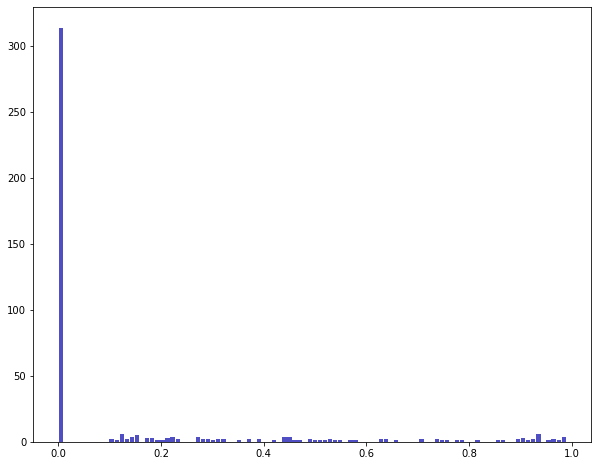

In [19]:
from pandas.api.types import CategoricalDtype

triplets = []
for b in bins_of_interest:
    bin_i_genes = [i for i in salmon_df.index if f"{b}_" in i]
    for s in salmon_df.columns:
        if not s in ['merger_col', 'gene_name']:
            triplets.append((b, s, (salmon_df.loc[bin_i_genes, s] > 0).sum() / len(bin_i_genes)))

triplet_frame = pd.DataFrame(triplets)
triplet_frame.columns = ['Bin', 'Sample', 'PercentOfGenesExpressed']

cat_bin = CategoricalDtype(bins_of_interest)
triplet_frame['Bin'] = triplet_frame['Bin'].astype(cat_bin)
triplet_frame['PercentOfGenesExpressed'] = triplet_frame['PercentOfGenesExpressed'].astype(float)

plt.figure(figsize=(10, 8))

n, bins, patches = plt.hist(x=triplet_frame['PercentOfGenesExpressed'], bins=100, color='#0504aa', alpha=0.7, rwidth=0.85)

plt.show()

In [20]:
print(salmon_df.columns[:-2])
old_cols = list(set(salmon_df.columns[:-2]) & set(hewson_translator.values()))
new_cols = list(set(salmon_df.columns[:-2]) - set(hewson_translator.values()))
print(len(new_cols), len(old_cols))
sample_corrs = salmon_df[new_cols + old_cols].corr()*100
for samp_c in new_cols:
    print(f"{samp_c}\t{round(sample_corrs.loc[samp_c, old_cols].max(), 2)}\t{sample_corrs.loc[samp_c, old_cols].idxmax()}")


print(f"{hewson_translator['SRR988008']}\t{round(sample_corrs.loc[hewson_translator['SRR988008'], new_cols].max(), 2)}\t{sample_corrs.loc[samp_c, new_cols].idxmax()}")
print(f"{hewson_translator['SRR988009']}\t{round(sample_corrs.loc[hewson_translator['SRR988009'], new_cols].max(), 2)}\t{sample_corrs.loc[samp_c, new_cols].idxmax()}")



Index(['5/17/10_Oxic_3m_1', '5/17/10_Oxic_13m_1', '5/17/10_Oxic_13m_2',
       '5/17/10_Oxic_3m_2', '9/21/11_Oxic_17m_2', '6/7/10_Anox_16.5m_1',
       '9/21/11_Oxic_17m_1', '6/7/10_Anox_16.5m_2', '7/11/10_Anox_17.5m_1',
       '7/11/10_Anox_17.5m_2', '7/11/10_Oxic_3m_1', '7/11/10_Oxic_3m_2',
       '8/5/10_Anox_22m_1', '8/5/10_Anox_22m_2', '8/30/10_Oxic_3m_1',
       '8/30/10_Oxic_3m_2', '8/30/10_Anox_20m_1', '8/30/10_Anox_20m_2',
       '10/18/10_Oxic_13m_1', '10/18/10_Oxic_13m_2', '7/08/11_Oxic_3m_1',
       '7/08/11_Oxic_3m_2', '5/24/11_Anox_18m_1', '4/18/11_Oxic_13.5m_1',
       '4/18/11_Oxic_13.5m_2', '5/24/11_Anox_18m_2', '6/14/11_Oxic_3m_2',
       '6/14/11_Anox_18m_1', '6/14/11_Anox_18m_2', '4_18_11_13.5m_1',
       '4_18_11_13.5m_2', '6_14_11_3m_5', '7_8_11_3m_21', '8_30_11_18m_18',
       '7_8_11_3m_22', '8_30_11_3m_15', '8_8_11_18m_9_2', '8_30_11_18m_17_2',
       '8_8_11_18m_10_2'],
      dtype='object')
10 29
7_8_11_3m_22	35.74	5/24/11_Anox_18m_1
6_14_11_3m_5	21.43	6/14/1

In [21]:
new_col_renamer = {'4_18_11_13.5m_1': '4/18/11_Oxic_13.5m_1',
                   '4_18_11_13.5m_2': '4/18/11_Oxic_13.5m_2',
                   '6_14_11_3m_5': '6/14/11_Oxic_3m_1',
                   '7_8_11_3m_21': '7/8/11_Oxic_3m_1',
                   '7_8_11_3m_22': '7/8/11_Oxic_3m_2',
                   '8_30_11_3m_15': '8/30/11_Oxic_3m',
                   '8_8_11_18m_9_2': '8/8/11_Anox_18m_1',
                   '8_30_11_18m_17_2': '8/30/11_Oxic_18m',
                   '8_8_11_18m_10_2': '8/8/11_Anox_18m_2'}

mislabelled_or_crap = ['7/08/11_Oxic_3m_2', "7/08/11_Oxic_3m_1", 
                       '4/18/11_Oxic_13.5m_1', '4/18/11_Oxic_13.5m_2', 
                       "8_30_11_18m_18"]

salmon_df_ = salmon_df.drop(mislabelled_or_crap, axis=1).rename(columns=new_col_renamer)
salmon_dfs_ = {i:j.drop(mislabelled_or_crap, axis=1).rename(columns=new_col_renamer) for i, j in salmon_dfs.items()}

print(salmon_df_.shape, (list(salmon_dfs_.values())[0]).shape)
print("\n".join(sorted(list(salmon_df_.columns))))

(201313, 36) (1051, 34)
10/18/10_Oxic_13m_1
10/18/10_Oxic_13m_2
4/18/11_Oxic_13.5m_1
4/18/11_Oxic_13.5m_2
5/17/10_Oxic_13m_1
5/17/10_Oxic_13m_2
5/17/10_Oxic_3m_1
5/17/10_Oxic_3m_2
5/24/11_Anox_18m_1
5/24/11_Anox_18m_2
6/14/11_Anox_18m_1
6/14/11_Anox_18m_2
6/14/11_Oxic_3m_1
6/14/11_Oxic_3m_2
6/7/10_Anox_16.5m_1
6/7/10_Anox_16.5m_2
7/11/10_Anox_17.5m_1
7/11/10_Anox_17.5m_2
7/11/10_Oxic_3m_1
7/11/10_Oxic_3m_2
7/8/11_Oxic_3m_1
7/8/11_Oxic_3m_2
8/30/10_Anox_20m_1
8/30/10_Anox_20m_2
8/30/10_Oxic_3m_1
8/30/10_Oxic_3m_2
8/30/11_Oxic_18m
8/30/11_Oxic_3m
8/5/10_Anox_22m_1
8/5/10_Anox_22m_2
8/8/11_Anox_18m_1
8/8/11_Anox_18m_2
9/21/11_Oxic_17m_1
9/21/11_Oxic_17m_2
gene_name
merger_col


In [22]:
sample_cnt = []
for k in avail_bins:
    nocrap = [i for i in avail_bins[k] if not i in mislabelled_or_crap]
    renamed = [new_col_renamer[i] if i in new_col_renamer else i for i in nocrap]
    derepd = [i[:-2] if i[-2:] == '_1' or i[-2:] == '_2' else i for i in renamed ]
    sample_cnt.append((k, len(set(derepd))))

    
print("\n".join([f"{i[0]}\t{i[1]}" for i in sorted(sample_cnt, key=lambda x: x[1])]))
    

CB33.bin.167	1
CBrest.bin.390	1
CBrest.bin.385	1
CBrest.bin.111	2
CB33.bin.201	2
CB33.bin.212	2
CB33.bin.32	2
CB33.bin.34	2
CBrest.bin.370	2
CBrest.bin.331	2
CB33.bin.146	3
CB33.bin.222	3
CB33.bin.56	3
CBrest.bin.189	3
CBrest.bin.196	3
CB33.bin.2	3
CBrest.bin.6	3
CB33.bin.175	3
CB33.bin.82	3
CB33.bin.86	3
CB33.bin.90	3
CB33.bin.186	3
CB33.bin.95	4
CBrest.bin.25	4
CBrest.bin.322	4
CBrest.bin.344	4
CB33.bin.179	4
CB33.bin.196	4
CB33.bin.202	4
CB33.bin.207	4
CB33.bin.218	4
CBrest.bin.327	4
CBrest.bin.223	4
CBrest.bin.374	4
CB33.bin.118	5
CB33.bin.219	5
CB33.bin.89	5
CBrest.bin.26	5
CBrest.bin.63	5
CBrest.bin.94	5
CBrest.bin.377	5
CB33.bin.84	5
CB33.bin.216	5
CB33.bin.227	5
CB33.bin.229	5
CBrest.bin.246	5
CB33.bin.61	5
CBrest.bin.394	5
CB33.bin.133	6
CB33.bin.174	6
CB33.bin.235	6
CB33.bin.191	6
CBrest.bin.118	6
CB33.bin.85	6
CBrest.bin.355	6
CBrest.bin.358	6
CBrest.bin.61	6
CBrest.bin.84	6
CBrest.bin.96	6
CBrest.bin.388	6
CBrest.bin.40	6
CB33.bin.182	6
CB33.bin.194	6
CB33.bin.233	6
CBrest.

In [23]:
for s in sorted(avail_samples):
    if not s in mislabelled_or_crap:
        b = avail_samples[s]
        if s in new_col_renamer:
            s = new_col_renamer[s]
        print(s, len(b))

10/18/10_Oxic_13m_1 22
10/18/10_Oxic_13m_2 21
4/18/11_Oxic_13.5m_1 13
4/18/11_Oxic_13.5m_2 1
5/17/10_Oxic_13m_1 14
5/17/10_Oxic_13m_2 15
5/17/10_Oxic_3m_1 20
5/17/10_Oxic_3m_2 20
5/24/11_Anox_18m_1 2
5/24/11_Anox_18m_2 1
6/14/11_Anox_18m_1 2
6/14/11_Anox_18m_2 11
6/14/11_Oxic_3m_2 7
6/7/10_Anox_16.5m_1 48
6/7/10_Anox_16.5m_2 47
6/14/11_Oxic_3m_1 1
7/11/10_Anox_17.5m_1 64
7/11/10_Anox_17.5m_2 64
7/11/10_Oxic_3m_1 68
7/11/10_Oxic_3m_2 66
7/8/11_Oxic_3m_1 6
7/8/11_Oxic_3m_2 4
8/30/10_Anox_20m_1 59
8/30/10_Anox_20m_2 58
8/30/10_Oxic_3m_1 50
8/30/10_Oxic_3m_2 50
8/5/10_Anox_22m_1 41
8/5/10_Anox_22m_2 41
8/30/11_Oxic_18m 2
8/30/11_Oxic_3m 9
8/8/11_Anox_18m_2 13
8/8/11_Anox_18m_1 34
9/21/11_Oxic_17m_1 23
9/21/11_Oxic_17m_2 9


In [29]:
dereplication_groups = {}
for c in salmon_df_.columns:
    if c.endswith("_2") or c.endswith("_1"):
        dereplication_groups[c[:-2]] = {i for i in salmon_df_.columns if i.startswith(c[:-2])}
    elif 'ox' in c.lower():
        dereplication_groups[c] = {c}
    else:
        dereplication_groups.setdefault('extras', set()).add(c)

print(len(dereplication_groups))
print("\n".join([f"{k}: {v}" for k, v in dereplication_groups.items()]))

19
5/17/10_Oxic_3m: {'5/17/10_Oxic_3m_1', '5/17/10_Oxic_3m_2'}
5/17/10_Oxic_13m: {'5/17/10_Oxic_13m_1', '5/17/10_Oxic_13m_2'}
9/21/11_Oxic_17m: {'9/21/11_Oxic_17m_1', '9/21/11_Oxic_17m_2'}
6/7/10_Anox_16.5m: {'6/7/10_Anox_16.5m_1', '6/7/10_Anox_16.5m_2'}
7/11/10_Anox_17.5m: {'7/11/10_Anox_17.5m_1', '7/11/10_Anox_17.5m_2'}
7/11/10_Oxic_3m: {'7/11/10_Oxic_3m_1', '7/11/10_Oxic_3m_2'}
8/5/10_Anox_22m: {'8/5/10_Anox_22m_2', '8/5/10_Anox_22m_1'}
8/30/10_Oxic_3m: {'8/30/10_Oxic_3m_2', '8/30/10_Oxic_3m_1'}
8/30/10_Anox_20m: {'8/30/10_Anox_20m_2', '8/30/10_Anox_20m_1'}
10/18/10_Oxic_13m: {'10/18/10_Oxic_13m_1', '10/18/10_Oxic_13m_2'}
5/24/11_Anox_18m: {'5/24/11_Anox_18m_1', '5/24/11_Anox_18m_2'}
6/14/11_Oxic_3m: {'6/14/11_Oxic_3m_1', '6/14/11_Oxic_3m_2'}
6/14/11_Anox_18m: {'6/14/11_Anox_18m_2', '6/14/11_Anox_18m_1'}
4/18/11_Oxic_13.5m: {'4/18/11_Oxic_13.5m_2', '4/18/11_Oxic_13.5m_1'}
7/8/11_Oxic_3m: {'7/8/11_Oxic_3m_1', '7/8/11_Oxic_3m_2'}
8/30/11_Oxic_3m: {'8/30/11_Oxic_3m'}
8/8/11_Anox_18m: {

In [30]:
sample_corrs = salmon_df_.corr()*100

In [31]:
dereplicated_srs = []
for new_name, old_cols in dereplication_groups.items():
    if len(old_cols) == 1 or new_name == 'extras':
        dereplicated_srs.append(salmon_df_[old_cols].copy())
    else:
        new_srs = salmon_df_[old_cols].sum(1) / 2
        new_srs.name = new_name
        dereplicated_srs.append(new_srs)
            
derep_df = pd.concat(dereplicated_srs, axis=1, verify_integrity=True)      
print(derep_df.shape)
print(derep_df.columns)

(201313, 20)
Index(['5/17/10_Oxic_3m', '5/17/10_Oxic_13m', '9/21/11_Oxic_17m',
       '6/7/10_Anox_16.5m', '7/11/10_Anox_17.5m', '7/11/10_Oxic_3m',
       '8/5/10_Anox_22m', '8/30/10_Oxic_3m', '8/30/10_Anox_20m',
       '10/18/10_Oxic_13m', '5/24/11_Anox_18m', '6/14/11_Oxic_3m',
       '6/14/11_Anox_18m', '4/18/11_Oxic_13.5m', '7/8/11_Oxic_3m',
       '8/30/11_Oxic_3m', '8/8/11_Anox_18m', '8/30/11_Oxic_18m', 'gene_name',
       'merger_col'],
      dtype='object')


In [93]:
sample_cols = list(derep_df.columns[:-3])
print(sample_cols, len(sample_cols))
annot_and_quant = derep_df.copy()
annot_and_quant['merger_col'] = annot_and_quant['merger_col'].apply(lambda x: (x[0], x[1] + "_" + x[2], x[3], x[4]))
print(len(set(annot_and_quant['merger_col']) & set(pathway_df['merger_col'])))
print(len(set(annot_and_quant['merger_col'])))
annot_and_quant = annot_and_quant.merge(pathway_df, on='merger_col', validate='1:m').copy()
descript_cols = ['genome', 'gene', 'locus_tag', 'product', 'query_id']


['5/17/10_Oxic_3m', '5/17/10_Oxic_13m', '9/21/11_Oxic_17m', '6/7/10_Anox_16.5m', '7/11/10_Anox_17.5m', '7/11/10_Oxic_3m', '8/5/10_Anox_22m', '8/30/10_Oxic_3m', '8/30/10_Anox_20m', '10/18/10_Oxic_13m', '5/24/11_Anox_18m', '6/14/11_Oxic_3m', '6/14/11_Anox_18m', '4/18/11_Oxic_13.5m', '7/8/11_Oxic_3m', '8/30/11_Oxic_3m', '8/8/11_Anox_18m', '8/30/11_Oxic_18m'] 18
201313
201313


In [102]:
reverse_gene_sets = {vv:k for k, v in gene_sets.items() for vv in v}
annot_and_quant['annotation_code'] = annot_and_quant.identifier.map(reverse_gene_sets)
print(annot_and_quant['annotation_code'].notnull().sum())
annot_and_quant = annot_and_quant[annot_and_quant.annotation_code.notnull()].copy()
#annot_and_quant.sample(1).T

7944


In [107]:
hq_bins = set(qualtax_df.index[(qualtax_df.Completeness > 80) & (qualtax_df.Contamination < 20)])
key2_genes = gene_sets['dsrAB']
key3_genes = gene_sets['rbcSL']

key_indexes = list()
for nit_gene in ['nirK/nirS+norBC', 'nrfAH', 'napAB+narIJ', 'nirABD']:
    key_pair = (nit_gene, 'dsrAB')
    these_genomes = annot_mat.index[annot_mat[list(key_pair)].sum(1) == 2]
    these_genomes = set(these_genomes) & hq_bins
    if len(these_genomes):
        for this_genome in these_genomes:
            key1_genes = gene_sets[key_pair[0]]
            key1_sub_genes = (annot_and_quant.identifier.isin(list(key1_genes)) &
                             (annot_and_quant.genome == this_genome))
            key_idx = list(annot_and_quant.index[key1_sub_genes])
            key1_nz_expression = annot_and_quant.loc[key1_sub_genes, sample_cols].sum() > 0

            key2_sub_genes = (annot_and_quant.identifier.isin(list(key2_genes)) & 
                             (annot_and_quant.genome == this_genome))
            key_idx += list(annot_and_quant.index[key2_sub_genes])
            key2_nz_expression = annot_and_quant.loc[key2_sub_genes, sample_cols].sum() > 0
            
            key3_sub_genes = (annot_and_quant.identifier.isin(list(key3_genes)) & 
                             (annot_and_quant.genome == this_genome))
            key_idx += list(annot_and_quant.index[key3_sub_genes])
            key3_nz_expression = annot_and_quant.loc[key3_sub_genes, sample_cols].sum() > 0
            
            stacked_bools = pd.concat([key1_nz_expression, key2_nz_expression], axis=1).T
            stacked_bools2 = pd.concat([key1_nz_expression, key2_nz_expression, key3_nz_expression], axis=1).T
            
            simultaneous_cols = set(stacked_bools.columns[stacked_bools.sum() == 2])
            simultaneous_cols.update(set(stacked_bools.columns[stacked_bools2.sum() == 3]))
            
            if len(simultaneous_cols):
                key_indexes += key_idx
                print("\t".join([this_genome, str(key_pair), str(list(simultaneous_cols))]))


CB33.bin.175	('nirK/nirS+norBC', 'dsrAB')	['8/8/11_Anox_18m', '7/11/10_Anox_17.5m']
CB33.bin.202	('nirK/nirS+norBC', 'dsrAB')	['8/30/10_Anox_20m', '8/8/11_Anox_18m', '7/11/10_Anox_17.5m']
CB33.bin.236	('nirK/nirS+norBC', 'dsrAB')	['8/30/10_Anox_20m', '6/7/10_Anox_16.5m', '6/14/11_Anox_18m', '8/8/11_Anox_18m', '7/11/10_Oxic_3m', '7/11/10_Anox_17.5m']
CB33.bin.222	('nirK/nirS+norBC', 'dsrAB')	['7/11/10_Anox_17.5m']
CB33.bin.216	('nirK/nirS+norBC', 'dsrAB')	['8/30/10_Anox_20m', '7/11/10_Anox_17.5m', '8/8/11_Anox_18m', '8/5/10_Anox_22m']
CB33.bin.196	('nirK/nirS+norBC', 'dsrAB')	['8/30/10_Anox_20m', '8/8/11_Anox_18m', '8/5/10_Anox_22m']
CB33.bin.175	('napAB+narIJ', 'dsrAB')	['7/11/10_Anox_17.5m']
CB33.bin.202	('napAB+narIJ', 'dsrAB')	['8/30/10_Anox_20m', '8/8/11_Anox_18m']
CB33.bin.236	('napAB+narIJ', 'dsrAB')	['8/30/10_Anox_20m', '6/14/11_Anox_18m', '8/8/11_Anox_18m', '7/11/10_Anox_17.5m']
CB33.bin.216	('napAB+narIJ', 'dsrAB')	['8/30/10_Anox_20m', '8/5/10_Anox_22m']
CBrest.bin.358	('napAB

In [108]:
excluded_cols = ['merger_col', 'merger_col_2', 'metacyc_target', 'ClusterID', 'GeneID']
included_cols = [i for i in annot_and_quant.columns if not i in excluded_cols and not i in sample_cols] + sample_cols
annot_and_quant[included_cols].sort_values(by=['genome', 'annotation_code']).to_csv('~/OneDrive - Johns Hopkins/CB_16S_Shotgun_Manuscript/Data/Functional_Gene_Expression_and_annotations_all.txt', sep="\t")
annot_and_quant.loc[set(key_indexes), included_cols].sort_values(by=['genome', 'annotation_code']).to_csv('~/OneDrive - Johns Hopkins/CB_16S_Shotgun_Manuscript/Data/Functional_Gene_Expression_and_annotations_no3r_rdsr_subset.txt', sep="\t")


In [ ]:
def make_report(qualtax_df, complete_list, cbTr_abnd2, cb33_abnd2, salmon_df, copy_num_df, gene_id_lookup3, gene_sets, gene_id_lookup2):
    
    report_df = qualtax_df.loc[complete_list, ['Completeness', 'Contamination', 'N50 (scaffolds)']]
    
    addl_columns = ['taxonomic leaf rank', 'taxonomic leaf name', 'max copy number', 
                    'genes mapped', 
                    'genes with sum >5x rpm expression', 'genes with mean >5x rpm expression', 
                    'median copy number (target genes)', 'sum expression (target genes)',
                    '# of enzymes max >1x (exp)', 'enzymes max >1x (exp)',
                    '# of enzymes max >10x (exp)', 'enzymes max >10x (exp)',
                    '# of enzymes max >1 rpm (copy)', 'enzymes max >1 rpm (copy)',
                    '# of enzymes max >10 rpm (copy)', 'enzymes max >10 rpm (copy)']
    
    for c in addl_columns:
        if c.startswith("enzymes"):
            report_df[c] = pd.Series(index=report_df.index, dtype=str, data=['']*len(report_df))
        else:
            report_df[c] = pd.Series(index=report_df.index, dtype=str)
    
    cbTrexp = [i for i in cbTr_abnd2.columns if not 'control' in i.lower()]
    cb33exp = [i for i in cb33_abnd2.columns if not 'ctrl' in i.lower()]
    
    numeric_exp = [i for i in salmon_df.columns if not i in ['merger_col', 'gene_name']]
    
    exp_keys = set(salmon_df.index)
    copy_num_keys = set(copy_num_df.index)
    exp_keys_translated = set([i for i in exp_keys if i in gene_id_lookup3 and gene_id_lookup3[i] in copy_num_keys])
    print(len(exp_keys_translated), 'expression keys available')
    
    for bof in complete_list:
        print("getting lowest classification")
        done_flag = False
        for c in ['Species', 'Genus', 'Family', 'Order', 'Class', 'Phylum', 'Domain']:
            cname = str(qualtax_df.loc[bof, c])
            if (cname.lower() in ['nan', '']):
                pass            
            elif not done_flag:
                done_flag = True
                report_df.loc[bof, 'taxonomic leaf rank'] = c
                report_df.loc[bof, 'taxonomic leaf name'] = cname
        
        if bof in (salmon_dfs.keys()):
            pass
            print(bof, report_df.loc[bof, 'taxonomic leaf name'])
        else:
            continue        
        
        if bof.startswith('CBrest'):
            slice_data = cbTr_abnd2.loc[bof, cbTrexp].copy()
        elif bof.startswith('CB33'):
            slice_data = cb33_abnd2.loc[bof, cb33exp].copy()
            
        report_df.loc[bof, 'max copy number'] = np.max(slice_data)
        report_df.loc[bof, 'num samples w/copy >1x'] = np.sum((slice_data > 1).astype(int))
        print(report_df.loc[bof, ['max copy number', 'num samples w/copy >1x']])
        all_exp_found = exp_keys.intersection(gene_id_lookup2[bof])
        #print('Genes found in copy num + expression data', len(all_exp_found))
        
        report_df.loc[bof, 'genes with sum >5x rpm expression'] = (salmon_df.loc[all_exp_found, numeric_exp].sum(1) > 5).sum()
        report_df.loc[bof, 'genes with mean >5x rpm expression'] = (salmon_df.loc[all_exp_found, numeric_exp].mean(1) > 5).sum()
        report_df.loc[bof, 'genes mapped'] = len(all_exp_found)
        report_df.loc[bof, 'expression variance'] = salmon_df.loc[all_exp_found, numeric_exp].sum(1).var() / 1e9
        report_df.loc[bof, '# of genes expressed'] = (salmon_df.loc[all_exp_found, numeric_exp] > 0).sum().sum()
        
        #print(report_df.loc[bof, ['genes with sum >5x rpm expression', 'genes with mean >5x rpm expression', 'genes mapped', 'expression variance']])
         
        copy_list = []
        expression_list = []
        for k, pre_keys in gene_sets.items():
            local_keys = [i for i in pre_keys if i.startswith(bof+"_")]
            expindx = set(local_keys) & set(salmon_df.index)
            if len(expindx):
                expvalue = np.max(salmon_df.loc[expindx, numeric_exp].sum())
                expression_list.append(expvalue)
                if expvalue >= 1:
                    report_df.loc[bof, 'enzymes max >1x (exp)'] = " ".join([report_df.loc[bof, 'enzymes max >1x (exp)'], f"{k}"])
                if expvalue >= 10:
                    report_df.loc[bof, 'enzymes max >10x (exp)'] = " ".join([report_df.loc[bof, 'enzymes max >10x (exp)'], f"{k}"])
            
            cnindx = set([gene_id_lookup3[lk] for lk in set(local_keys) & exp_keys_translated]) 
            if len(cnindx):
                cnvalue = np.max(copy_num_df.loc[cnindx, :].sum())
                copy_list.append(cnvalue)
                if cnvalue >= 1:
                    report_df.loc[bof, 'enzymes max >1 rpm (copy)'] = " ".join([report_df.loc[bof, 'enzymes max >1 rpm (copy)'], f"{k}"])
                if cnvalue >= 10:
                    report_df.loc[bof, 'enzymes max >10 rpm (copy)'] = " ".join([report_df.loc[bof, 'enzymes max >10 rpm (copy)'], f"{k}"])
        
        #print(report_df.loc[bof, ['enzymes max >1x (exp)', 'enzymes max >10x (exp)', 
        #                         'enzymes max >1 rpm (copy)', 'enzymes max >10 rpm (copy)']].T)
        
        if len(copy_list):
            report_df.loc[bof, 'median copy number (target genes)'] = np.median(np.array(copy_list))
        
        if len(expression_list):
            report_df.loc[bof, 'sum expression (target genes)'] = np.sum(np.array(expression_list))

        #print(report_df.loc[bof, ['median copy number (target genes)', 'sum expression (target genes)']].T)
        
        report_df.loc[bof, '# of enzymes max >1x (exp)'] = len(report_df.loc[bof, 'enzymes max >1x (exp)'].split())
        report_df.loc[bof, '# of enzymes max >10x (exp)'] = len(report_df.loc[bof, 'enzymes max >10x (exp)'].split())
        report_df.loc[bof, '# of enzymes max >1 rpm (copy)'] = len(report_df.loc[bof, 'enzymes max >1 rpm (copy)'].split())
        report_df.loc[bof, '# of enzymes max >10 rpm (copy)'] = len(report_df.loc[bof, 'enzymes max >10 rpm (copy)'].split())
        
    cols_to_rank = ['max copy number', 'num samples w/copy >1x', 'sum expression (target genes)',
                    '# of genes expressed']
    
    rank_cols = [i+" Rank" for i in cols_to_rank]
    
    for cr, rc in zip(cols_to_rank, rank_cols):
        report_df[rc] = report_df[cr].rank()
    
    report_df['mean rank'] = report_df[rank_cols].mean(1)
    return report_df


In [ ]:
copy_data_file = "/Volumes/KeithSSD/SulFox/data/gene_expression/gene_copy_number_data.txt"
copy_duplicates_file = "/Volumes/KeithSSD/SulFox/data/gene_expression/copy_number_duplicate_clusters.txt"
copy_num_df = load_cn_data(copy_data_file, copy_duplicates_file)

gene_id_lookup2 = pathway_df[['genome', 'merger_col']].dropna().groupby('genome').agg(set)['merger_col'].to_dict()
gene_id_lookup2 = {i:{"_".join(kk) for kk in k} for i, k in gene_id_lookup2.items()}
gene_id_lookup3 = {i:j for i, j in pathway_df[['identifier', 'GeneID']].dropna().values}
report_df = make_report(qualtax_df, complete_list, cbTr_abnd2, cb33_abnd2, derep_df, 
                        copy_num_df, gene_id_lookup3, gene_sets, gene_id_lookup2)


In [ ]:
gene_cats = pd.read_csv('/Volumes/KeithSSD/SulFox/data/genes_by_pathway.txt', header=None, sep="\t")

n_genes = np.array(list(gene_cats.iloc[15:23, 1]))
print(n_genes)
s_genes = np.array(list(gene_cats.iloc[23:-7, 1]))
print(s_genes)
add_genes_N = lambda x: " ".join(list(n_genes[annot_mat.loc[x, n_genes]]))
add_genes_S = lambda x: " ".join(list(s_genes[annot_mat.loc[x, s_genes]]))
report_df2 = report_df.sort_values(by='mean rank', ascending=False)
srs1df = pd.Series({i:add_genes_N(i) for i in report_df.index}, name='N')
srs1df.name = 'N genes'
srs2df = pd.Series({i:add_genes_S(i) for i in report_df.index}, name='S')
srs1df.name = 'S genes'
report_df3 = report_df2.copy().join(srs1df).join(srs2df)


In [ ]:
outdir = '/Users/login/OneDrive - Johns Hopkins/CB_16S_Shotgun_Manuscript/Supplemental Materials'
writer = pd.ExcelWriter(f"{outdir}/bin_prioritization_report.xlsx", engine='xlsxwriter')
report_df3.to_excel(writer)
writer.save()

In [ ]:
qualtax_df.loc[qualtax_df['Genus'] == 'AAA536-G10'].T

cbTr_abnd2.loc['CBrest.bin.174', :] > 1

In [ ]:
bins_of_focus = ["CBrest.bin.375", # Thiohalospirales
                 "CBrest.bin.263", # Thioglobaceae
                 "CBrest.bin.246", # Nitrosopumilus
                 "CB33.bin.142", # AAA164-E04
                 "CB33.bin.111", # Vulcanococcus sp000179255
                 "CB33.bin.196", # GCA-001735895
                 "CB33.bin.182", # UBA8477
                 "CBrest.bin.358", # Marivivens
                 "CB33.bin.236", # Sedimenticola 
                 'CBrest.bin.385'] # HIMB11 sp003486095

bins_of_focus = set(bins_of_focus) | set(["CB33.bin.222", # Magnetovibrionaceae
                                          "CB33.bin.175", # UBA3470
                                          "CB33.bin.202", # GCF-002020805
                                          "CBrest.bin.40"]) # Sedimenticolaceae

qualtax_df.loc[bins_of_focus, ['Genus', 'Family', 'Order', 'Class', 'Phylum']]
(annot_mat.loc[bins_of_focus, :].T.sum(1) > 0).sum()

In [ ]:
special_gene_sets = set([annot for bof in bins_of_focus for annot in annot_mat.columns[annot_mat.loc[bof, :]]])
special_gene_sets = special_gene_sets - set(['', 'bcl_synth', 'taurine_degradation'])

housekeepers = ["proC", "recA", "rpoD", "rho", "glyA", "tpiA", "recF"]
writer = pd.ExcelWriter(f"{outdir}/priority_expression_report.xlsx", engine='xlsxwriter')

expression_summaries = {}
housekeepers_to_annotate = {}
numeric_exp = [i for i in derep_df.columns if not i in dereplication_groups['extras']]

for bof in bins_of_focus:
    bof_df = derep_df.loc[[i for i in derep_df.index if i.startswith(f"{bof}_")], numeric_exp].copy()
    special_genes = {}
    for sgs in special_gene_sets:
        for eid_ in gene_sets[sgs]:
            if eid_.startswith(bof+"_"):
                possible_name = "--".join(set(pathway_df.loc[pathway_df['identifier'] == eid_, 'gene'].dropna().values))
                possible_qid = "--".join(set(pathway_df.loc[pathway_df['identifier'] == eid_, 'query_id'].dropna().values))
                possible_prod = "--".join(set(pathway_df.loc[pathway_df['identifier'] == eid_, 'product'].dropna().values))
                special_genes[eid_] = {'bin':bof, 'enzyme':sgs, 'gene_type':'functional', 
                                       'gene': None, 'title': None, 'hmm':None}
                special_genes[eid_].update({'sequence':seq_map[eid_]})
                
                for field, possib in zip([possible_name, possible_qid, possible_prod], ['gene', 'hmm', 'title']):
                    special_genes[eid_].update({possib:field})
                if eid_ in set(bof_df.index):
                    special_genes[eid_].update(bof_df.loc[eid_, :].to_dict())
    
    for h in housekeepers:
        hbool = (pathway_df.gene == h) & (pathway_df.genome == bof)
        if hbool.sum() > 0:
            hid_s = set(pathway_df.loc[hbool, 'identifier'])
            for eid_ in hid_s:
                special_genes[eid_] = {'bin':bof, 'enzyme':h, 'gene_type':'housekeeper', 
                                       'gene': None, 'title': None, 'hmm':None}
                special_genes[eid_].update(bof_df.loc[eid_, :].to_dict())
                special_genes[eid_].update({'sequence':seq_map[eid_]})
                housekeepers_to_annotate[eid_] = seq_map[eid_]
    
    topranked = list(bof_df.sum(1).sort_values(ascending=False).index[:50])
    needed_cols = ['gene', 'product', 'query_id', 'identifier']
    catagg = lambda x: "--".join(set(x.dropna()))
    highlights_top = pathway_df.loc[pathway_df.identifier.isin(topranked), needed_cols].groupby('identifier').agg(catagg)
    highlights_top = highlights_top.drop([i for i in highlights_top.index if i in special_genes])
    for eid_ in highlights_top.index:
        if not eid_ in special_genes:
            special_genes[eid_] = {'bin':bof, 'gene_type':'ranked', 'hmm':None, 'enzyme': None,
                                   'title':highlights_top.loc[eid_, 'product'], 
                                   'gene':highlights_top.loc[eid_, 'gene']}
            special_genes[eid_].update(bof_df.loc[eid_, :].to_dict())
            special_genes[eid_].update({'sequence':seq_map[eid_]})
        else:
            special_genes[eid_]['gene_type'] = special_genes[eid_]['gene_type'] + "+ranked"
    
    expression_summary = pd.DataFrame(special_genes).T
    bad_cols = np.array(numeric_exp)[expression_summary.loc[expression_summary.enzyme.isin(housekeepers), numeric_exp].sum() == 0]
    to_drop = highlights_top.index[(expression_summary.loc[list(highlights_top.index), bad_cols] > 0).sum(1) != 0]
    expression_summary.drop(to_drop, axis=0, inplace=True)
    expression_summary = expression_summary.loc[:, [i for i in expression_summary.columns if i != 'sequence']+['sequence']]
    expression_summary.to_excel(writer, sheet_name=f'{bof}')
    expression_summaries[bof] = expression_summary.copy()

writer.save()


In [ ]:

a = derep_df.loc[gene_sets['nirABD'] & set(derep_df.index) , :]
b = derep_df.loc[gene_sets['nirK/nirS+norBC'] & set(derep_df.index), :]
print(a.mean())
print(b.mean())
print(a.shape, b.shape)

In [ ]:
df = pd.DataFrame(index=bins_of_focus, columns=list(special_gene_sets | set(gene_cats[1]))).T.fillna(0)
print(df.shape)
print(set(df.index) - set(gene_cats[1]))
print(set(gene_cats[1]) - set(df.index))

for b in df.columns:
    print(b, report_df.loc[b, 'taxonomic leaf name'])
    exp_sum_i = expression_summaries[b]
    hslice = exp_sum_i.loc[exp_sum_i.gene_type == 'housekeeper', numeric_exp].mean()
    
    for gene in df.index:
        if gene in housekeepers:
            hbool = (pathway_df.gene == gene) & (pathway_df.genome == b)
            if hbool.sum() > 0:
                df.loc[gene, b] += 1
        elif gene in set(annot_mat.columns):
            if gene in set(annot_mat.columns[annot_mat.loc[b, :]]):
                df.loc[gene, b] += 1
        else:
            raise ValueError("Missing gene from annot mat / housekeepers")
    
        if gene in set(exp_sum_i.enzyme):
            gslice = exp_sum_i.loc[exp_sum_i.enzyme == gene, numeric_exp]
            df.loc[gene, b] += int(((gslice.mean() / hslice.mean()) > 0).sum() > 0)

In [ ]:
figdir = f"{os.path.dirname(outdir)}/Figures"
df = df.loc[[i for i in gene_cats[1] if i in set(df.index)], :]
gene_names_and_cats = {i:"{} ({})".format(i, j.lower()) for i, j in gene_cats.set_index(1)[0].to_dict().items()}
bin_names_and_taxa = {i:"{} ({})".format(i, report_df.loc[i, 'taxonomic leaf name']) for i in df.columns}
dfp = df.rename(index=gene_names_and_cats, columns=bin_names_and_taxa)

# plot

myColors = ((1.0, 1.0, 1.0, 0.0), 
            (0.4, 0.4, 0.4, 0.4), 
            (0.0, 0.0, 0.0, 1.0))
cmap = LinearSegmentedColormap.from_list('Custom', myColors, len(myColors))

sns.set(font="Calibri", font_scale=0.74)
plt.close('all')
fig = plt.figure(constrained_layout=True, figsize=(6*1.2, 8*1.2), dpi=300, num=1)
gs = fig.add_gridspec(8, 6)
ax = fig.add_subplot(gs[:-1, :])
ax2 = fig.add_subplot(gs[-1, 0])
#ax3 = fig.add_subplot(gs[-1, 0])
cm_fig = sns.heatmap(dfp, cbar_ax=ax2, ax=ax, cmap=cmap, linewidths=.2, cbar_kws={'drawedges':True})
ax.set_xticklabels(ax.get_xticklabels(),rotation=30, ha="right")
ax2.set_yticklabels(['Not Observed', 'Annotation Observed', '>1x expression observed'])
ax2.yaxis.set_ticks([ 0.3, 0.9, 1.6])
fig.savefig(f'{figdir}/gene_repertoire.png', dpi=300)

In [ ]:
transcripts_detected = (((derep_df.loc[:, numeric_exp] > 0).sum().sort_index() / len(derep_df))*100)
plt.figure(figsize=(10, 8))

n, bins, patches = plt.hist(x=transcripts_detected, bins=10, color='#0504aa', alpha=0.7, rwidth=0.85)

plt.show()
print((transcripts_detected < 3).sum(), len(transcripts_detected))
transcripts_detected

In [ ]:
dsrdudes = ['CB33.bin.149', 'CBrest.bin.263', 'CB33.bin.191', 'CB33.bin.233', 'CB33.bin.196', 
            'CBrest.bin.358', 'CB33.bin.236', 'CBrest.bin.394', 'CB33.bin.235', 'CBrest.bin.368',
            'CB33.bin.202', 'CB33.bin.216', 'CB33.bin.174', 'CB33.bin.186', 'CBrest.bin.322', 'CB33.bin.118',
            'CB33.bin.222', 'CB33.bin.175']
qualtax_df.loc[dsrdudes, ['Phylum', 'Class', 'Order', 'Family', 'Genus']]

In [ ]:

cb33_cols = [i for i in set(copy_num_df.columns) & set(cb33_abnd2.columns) if not i.startswith('Zymo') and not i.startswith('SERC')]
cb33_tuples = [i.replace("CB33_", "").replace("June", "6").replace("Aug", "8").replace("July", "7").replace("_2017", "") for i in cb33_cols]
cb33_tuples = [i.replace("_R2", "").replace("R2", "").replace("_R7", "").replace("_R1", "").split("_") for i in cb33_tuples]
cb33_tuples = [[i[0], i[-1]] for i in cb33_tuples]
cb33_df = pd.DataFrame(index=cb33_cols, data=cb33_tuples)
cb33_df[2] = cb33_df[1].apply(lambda x: int(x.replace("m", "")))
cb33_df = cb33_df.sort_values(by=[0, 2])
cb33_df['label'] = cb33_df[0] + "-33-" + cb33_df[1]

cbRest_df = pd.DataFrame(index=cbRest_cols, data=cbRest_tuples)

cbRest_cols = [i for i in set(copy_num_df.columns) - set(cb33_abnd2.columns) if not 'Bay_Bridge' in i and not 'Negative' in i]
cbRest_tuples = [i.split("_") for i in cbRest_cols]
cbRest_df = pd.DataFrame(index=cbRest_cols, data=cbRest_tuples)
cbRest_df.loc[cbRest_df[0] == '4102017', 0] = '41017'
cbRest_df.loc[cbRest_df[0] == '6617', 0] = '60617'
cbRest_df.loc[cbRest_df[0] == '6517', 0] = '60517'
cbRest_df.loc[cbRest_df[1] == 'CB53-1', 1] = 'CB53'
cbRest_df[3] = cbRest_df[0].apply(lambda x: x[0])
cbRest_df[4] = cbRest_df[1].apply(lambda x: x.replace("CB", "").replace('C', ""))
cbRest_df = cbRest_df.sort_values(by=[2,3,4])
cbRest_df['label'] = cbRest_df[3] + "-" + cbRest_df[4] + "-" + cbRest_df[2]

cb33copies = copy_num_df[list(cb33_df.index)]
cbRestcopies = copy_num_df[list(cbRest_df.index)]

exp_cols = [i for i in salmon_df.columns if not i == 'merger_col']
exp_tuples = [i.split("_") for i in exp_cols]
exp_df = pd.DataFrame(index=exp_cols, data=exp_tuples)
exp_df[4] = exp_df[0].apply(lambda x: x.split("/")[0])
exp_df['label'] = exp_df[4] + "-43-" + exp_df[1]
exp_df = exp_df.sort_values(by=[1, 4])

import matplotlib.gridspec as gridspec

plt.close('all'); plt.clf();
fig2 = plt.figure(constrained_layout=True, figsize=(11, 8), dpi=300, num=2)
gs2 = gridspec.GridSpec(ncols=10, nrows=11, figure=fig2)
all_axes = {}
for b_i, bof in enumerate(bins_of_focus):
    spec_ax = {}
    spec_ax['name'] = fig2.add_subplot(gs2[b_i, 0], facecolor="white", frameon=True)
    _ = spec_ax['name'].set_xlim(-1, 1.)
    _ = spec_ax['name'].set_ylim(-1, 1.)
    _ = spec_ax['name'].axes.get_xaxis().set_ticks([])
    _ = spec_ax['name'].axes.get_yaxis().set_ticks([])
    _ = spec_ax['name'].text(0, .5, bof, ha="center", va="center")
    _ = spec_ax['name'].text(0, -.5, report_df.loc[bof, 'taxonomic leaf name'], ha="center", va="center")
    ##################################################
    spec_ax['cb33'] = fig2.add_subplot(gs2[b_i, 1:4], facecolor="white", frameon=True)
    cleaned_2 = set(pathway_df.loc[pathway_df['genome'] == bof, 'GeneID'].dropna())
    cleaned_4 = cleaned_2 & set(copy_num_df.index)
    cb33_slice = cb33copies.loc[cleaned_4, :].apply(np.median).values
    cb33_upper = cb33copies.loc[cleaned_4, :].apply(lambda x: np.percentile(x, 75)).values - cb33_slice
    cb33_lower = cb33_slice - cb33copies.loc[cleaned_4, :].apply(lambda x: np.percentile(x, 25)).values
    cb33_yerr  = np.vstack((cb33_upper, cb33_lower))
    _ = spec_ax['cb33'].errorbar(np.arange(len(cb33_df)), cb33_slice, yerr=cb33_yerr, 
            color='k', marker='.', capsize=1, capthick=1, ecolor='black')
    # _ = spec_ax['cb33'].plot(np.arange(len(cb33_df)), cb33_slice, color='k')
    if b_i == (len(bins_of_focus) - 1):
        _ = spec_ax['cb33'].set_xticks(np.arange(len(cb33_df)))
        _ = spec_ax['cb33'].set_xticklabels(list(cb33_df['label']), rotation=90, ha="center")
    else:
        _ = spec_ax['cb33'].axes.get_xaxis().set_ticks([])
    ##################################################
    spec_ax['cbrest'] = fig2.add_subplot(gs2[b_i, 4:8], facecolor="white", frameon=True)
    cbRest_slice = cbRestcopies.loc[cleaned_4, :].apply(np.median).values
    _ = spec_ax['cbrest'].plot(np.arange(len(cbRest_slice)), cbRest_slice, color='k')
    if b_i == (len(bins_of_focus) - 1):
        _ = spec_ax['cbrest'].set_xticks(np.arange(len(cbRest_slice)))
        _ = spec_ax['cbrest'].set_xticklabels(list(cbRest_df['label']), rotation=90, ha="center")
    else:
        _ = spec_ax['cbrest'].axes.get_xaxis().set_ticks([])
    ##################################################
    spec_ax['mrna'] = fig2.add_subplot(gs2[b_i, 8:10], facecolor="white", frameon=True)
    exp_slice = salmon_dfs[bof].loc[:, exp_df.index].apply(np.median).values
    _ = spec_ax['mrna'].plot(np.arange(len(exp_df)), exp_slice, color='k')
    if b_i == (len(bins_of_focus) - 1):
        _ = spec_ax['mrna'].set_xticks(np.arange(len(exp_slice)))
        _ = spec_ax['mrna'].set_xticklabels(list(exp_df['label']), rotation=90, ha="center")
    else:
        _ = spec_ax['mrna'].axes.get_xaxis().set_ticks([])
    ##################################################
    all_axes[bof] = spec_ax

all_axes['annotations'] = fig2.add_subplot(gs2[-1, :], facecolor="white", frameon=True)
_ = all_axes['annotations'].axes.get_xaxis().set_ticks([])
_ = all_axes['annotations'].axes.get_yaxis().set_ticks([])
fig2.savefig('/Volumes/KeithSSD/SulFox/figures/bin_location.png', dpi=300)